# **Project Title: Online Retail Customer Segmentation**

**Project type** - Unsupervised ML

**Contribution** - Individual

## <b> Problem Description </b>

In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## **Importing Libraries and Loading Dataset**

In [78]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing libraries necessary for clustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

import datetime as dt
import math
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [79]:
#Load the dataset
customer_df=pd.read_csv('https://raw.githubusercontent.com/hamant-jagwan/Online_Retail_Customer_Segmentation_Unsupervised_leaning/refs/heads/main/Data.csv')

In [80]:
#checking top 5 rows of dataset
customer_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom


In [81]:
# checking shape of dataset 
customer_df.shape

(541909, 8)

In [82]:
# basic information of dataset
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## <b> Data Description </b>

### <b>Attribute Information: </b>

* **InvoiceNo**: Invoice number. (Nominal), a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* **StockCode**: Product (item) code. (Nominal), a 5-digit integral number uniquely assigned to each distinct product.
* **Description**: Product (item) name. (Nominal).
* **Quantity**: The quantities of each product (item) per transaction. (Numeric).
* **InvoiceDate**: Invice Date and time. (Numeric), the day and time when each transaction was generated.
* **UnitPrice**: Unit price. (Numeric), Product price per unit in sterling.
* **CustomerID**: Customer number. (Numeric), a 5-digit integral number uniquely assigned to each customer.
* **Country**: Country name. (Nominal), the name of the country where each customer resides.

**Observation**: 
*As we can see we have most of null values in customerID and all other columns look fine. we can drop those null values in customerID columns as we are making customer segmentation and keeping those null values make no sense*

## **Data Cleaning**

**checking for null values**

In [83]:
# checking for null values in dataset
customer_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

**Observation** :
*Here we have null values present in our dataset like in CustomerID and Description. we can drop those null values in customerID columns as we are making customer segmentation and keeping those null values make no sense***

In [84]:
# dropping null values
customer_df.dropna(inplace = True)

In [85]:
# checking for missing values
customer_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [86]:
customer_df.shape

(406829, 8)

*After removing null value from our dataset.*
*Now we have 406829 rows and 8 columns in our dataset.*

In [87]:
customer_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom


In [88]:
# changing datatype
customer_df['InvoiceNo'] = customer_df['InvoiceNo'].astype('str')

In [89]:
customer_df = customer_df[~customer_df['InvoiceNo'].str.contains('C')]


*Here we dropped some InvoiceNo which starts with 'c' because 'c' indicates a cancellation.*

In [90]:
# Checking summary
customer_df.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


## **Exploratory data analysis**

### **Description Name**

In [91]:
Description_df = customer_df['Description'].value_counts().reset_index()
Description_df.rename(columns={'Description': 'Description_Name','count': 'Count'}, inplace=True)

#top 5 Description Name
Description_df.head()

,Description_Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2028
1,REGENCY CAKESTAND 3 TIER,1724
2,JUMBO BAG RED RETROSPOT,1618
3,ASSORTED COLOUR BIRD ORNAMENT,1408
4,PARTY BUNTING,1397


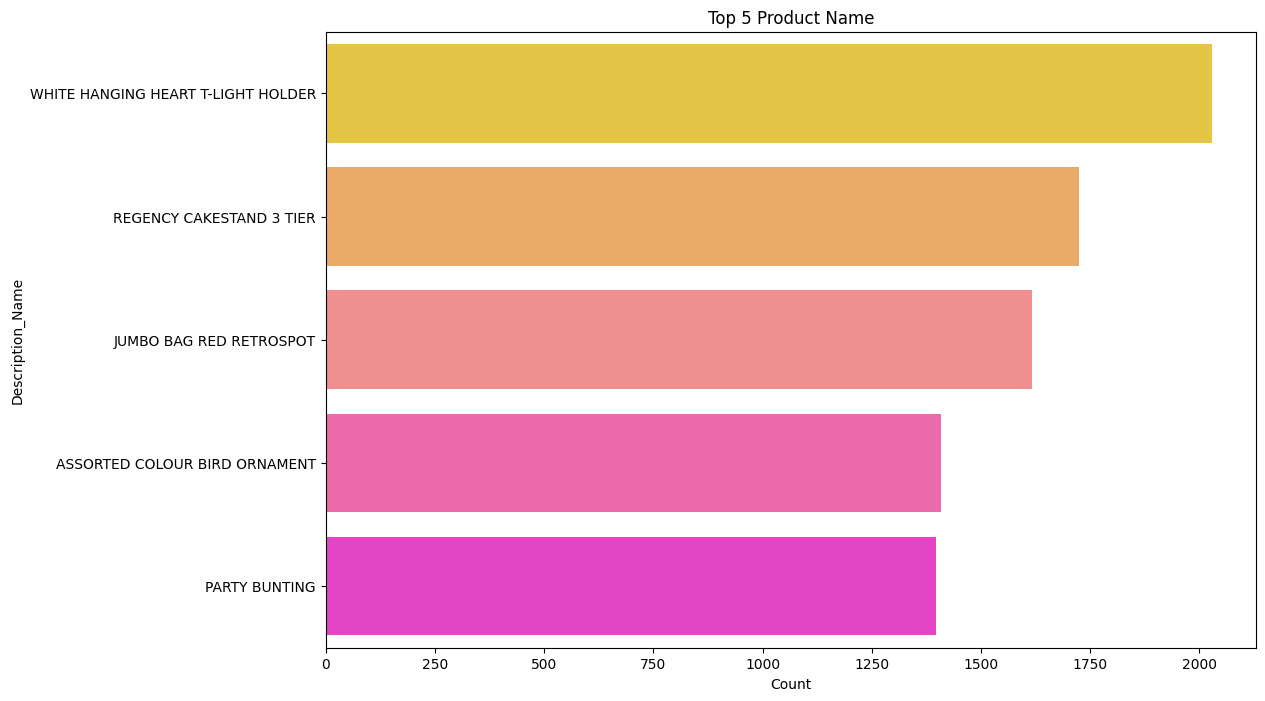

In [92]:
# plot top 5 product name
plt.figure(figsize = (12,8))
plt.title('Top 5 Product Name')
sns.barplot(x = 'Count', y = 'Description_Name', data = Description_df[:5], palette = 'spring_r');

In [93]:
# bottom 5 description name
Description_df.tail()

,Description_Name,Count
3872,CLASSIC DIAMANTE NECKLACE JET,1
3873,DIAMANTE NECKLACE BLACK,1
3874,ANT SILVER TURQUOISE BOUDICCA RING,1
3875,PINK CHERRY BLOSSOM CUP & SAUCER,1
3876,BLUE PADDED SOFT MOBILE,1


### **StockCode Name**

In [94]:
StockCode_df = customer_df['StockCode'].value_counts().reset_index()
StockCode_df    
StockCode_df.rename(columns = {'StockCode' : 'StockCode_Name','count': 'Count'}, inplace = True)

# top 5 stockcode name
StockCode_df.head()


,StockCode_Name,Count
0,85123A,2035
1,22423,1724
2,85099B,1618
3,84879,1408
4,47566,1397


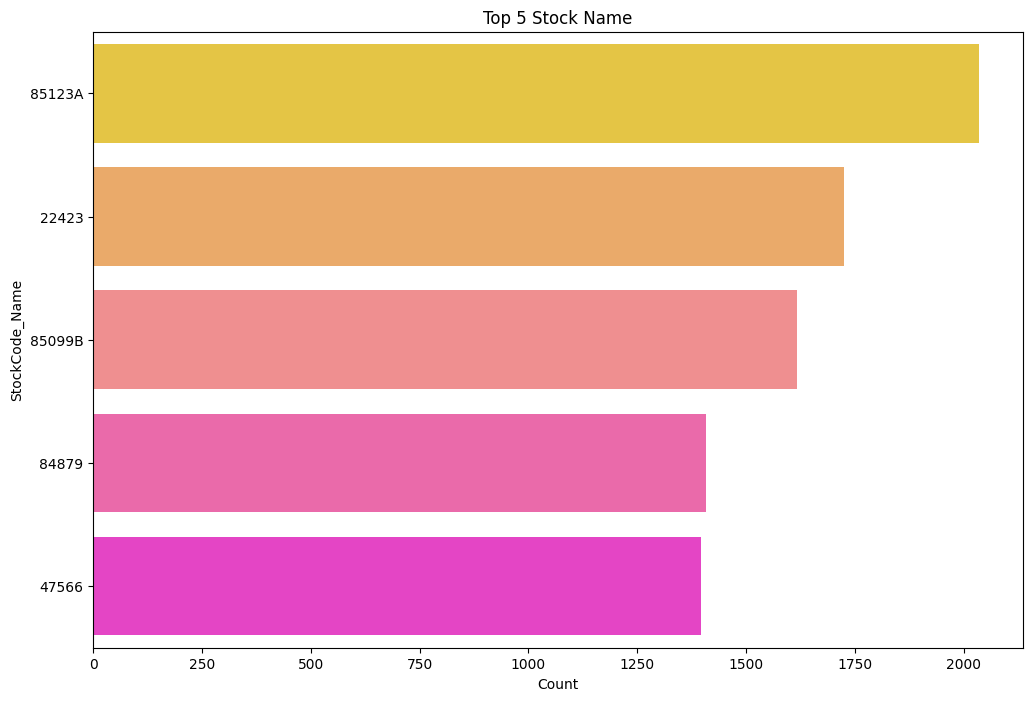

In [95]:
#plot top 5 stockcode name
plt.figure(figsize=(12,8))
plt.title('Top 5 Stock Name')
sns.barplot(x='Count',y='StockCode_Name',data=StockCode_df[:5], palette='spring_r');

In [96]:
StockCode_df.tail()

,StockCode_Name,Count
3660,90214Z,1
3661,90214U,1
3662,23449,1
3663,90214W,1
3664,23843,1


### **Country Name**

In [97]:
country_df = customer_df['Country'].value_counts().reset_index()

#top 5 country name
country_df.head()

,Country,count
0,United Kingdom,354345
1,Germany,9042
2,France,8342
3,EIRE,7238
4,Spain,2485


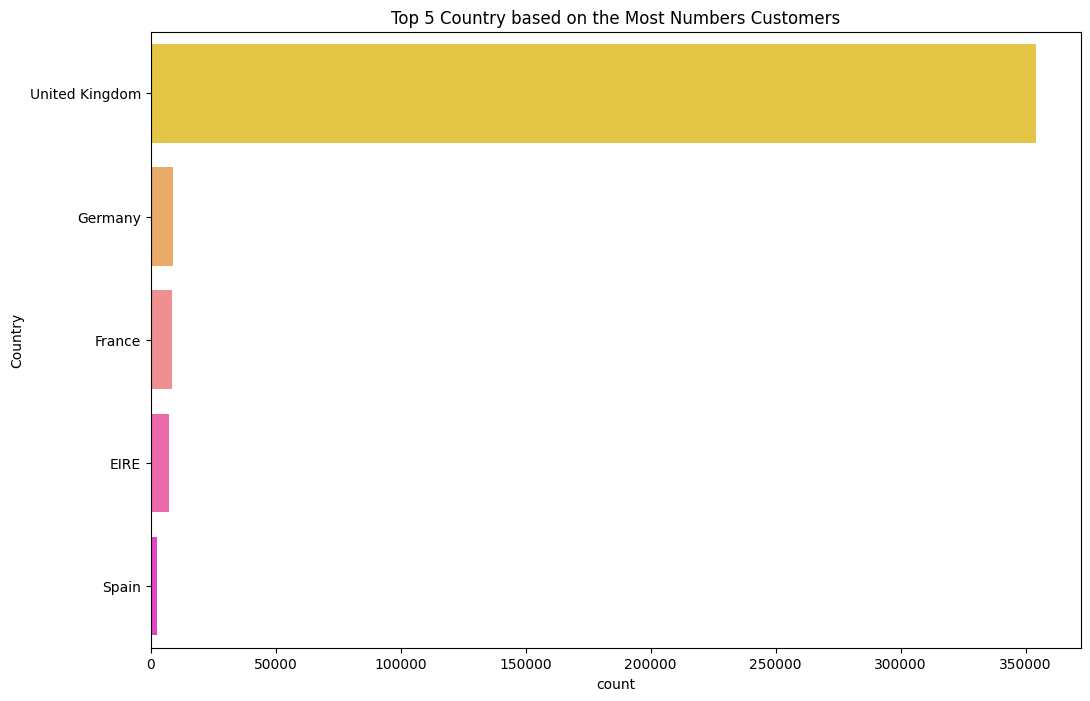

In [98]:
#plot top 5 country name
plt.figure(figsize=(12,8))
plt.title('Top 5 Country based on the Most Numbers Customers')
sns.barplot(x='count',y='Country',data=country_df[:5], palette='spring_r');

In [99]:
# bottom 5 country name
country_df.tail()

,Country,count
32,Lithuania,35
33,Brazil,32
34,Czech Republic,25
35,Bahrain,17
36,Saudi Arabia,9


### **Distribution of Quality**

In [100]:
customer_df['Quantity'].sort_values()

541846        1
541845        1
541859        1
541857        1
541856        1
          ...  
206121     4300
421632     4800
502122    12540
61619     74215
540421    80995
Name: Quantity, Length: 397924, dtype: int64

*There is a typing error in the Quantity column. There is a minimum value of -80995 which is wrong because It is impossible to get negative Quantity*

In [101]:
customer_df['Quantity'] = customer_df['Quantity'].apply(abs)


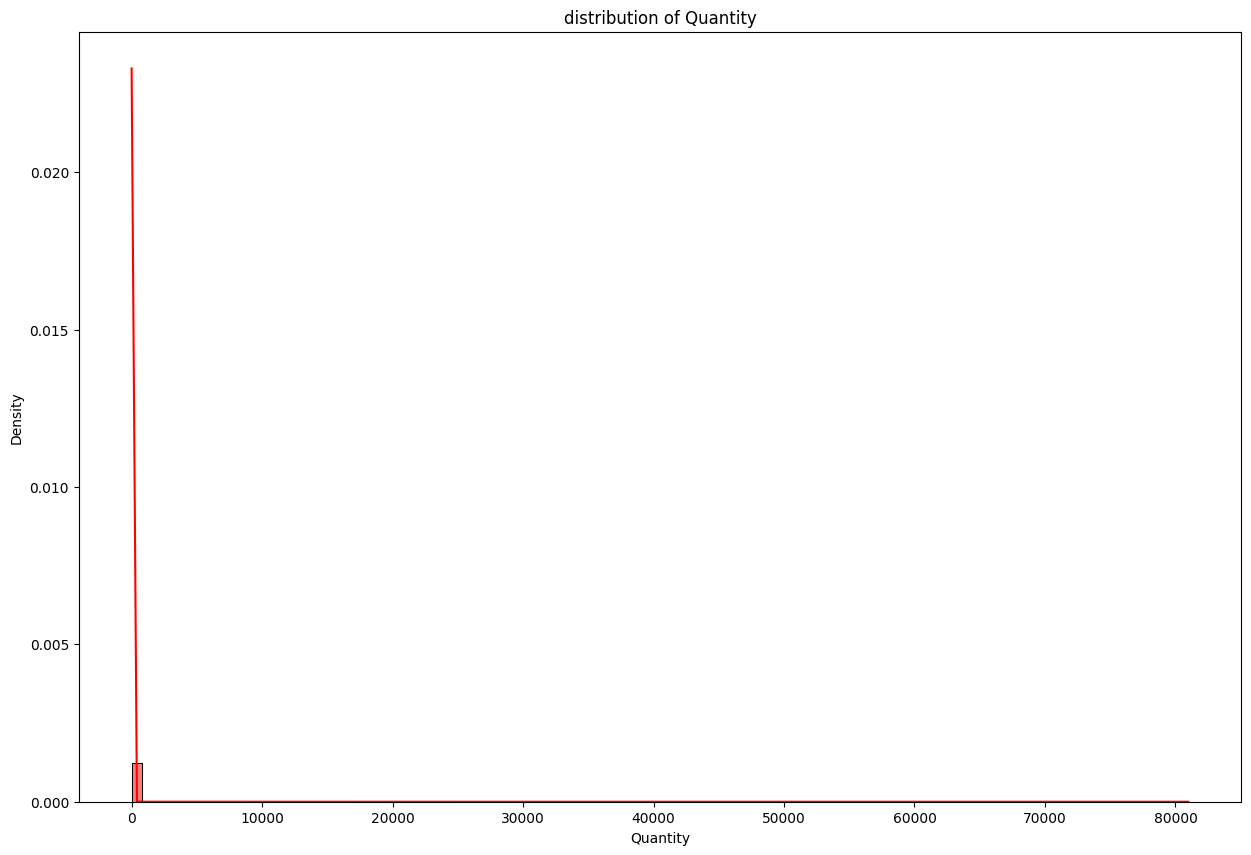

In [102]:
#distribution of Quantity
plt.figure(figsize=(15,10))
plt.title('distribution of Quantity')
sns.histplot(customer_df['Quantity'],color="r",kde= True , stat= 'density', bins= 100);

**Observation:** 
*Here we can see that its a Positively skewed (or right-skewed) distribution. It is a type of distribution in which most values are clustered around the left tail of the distribution*

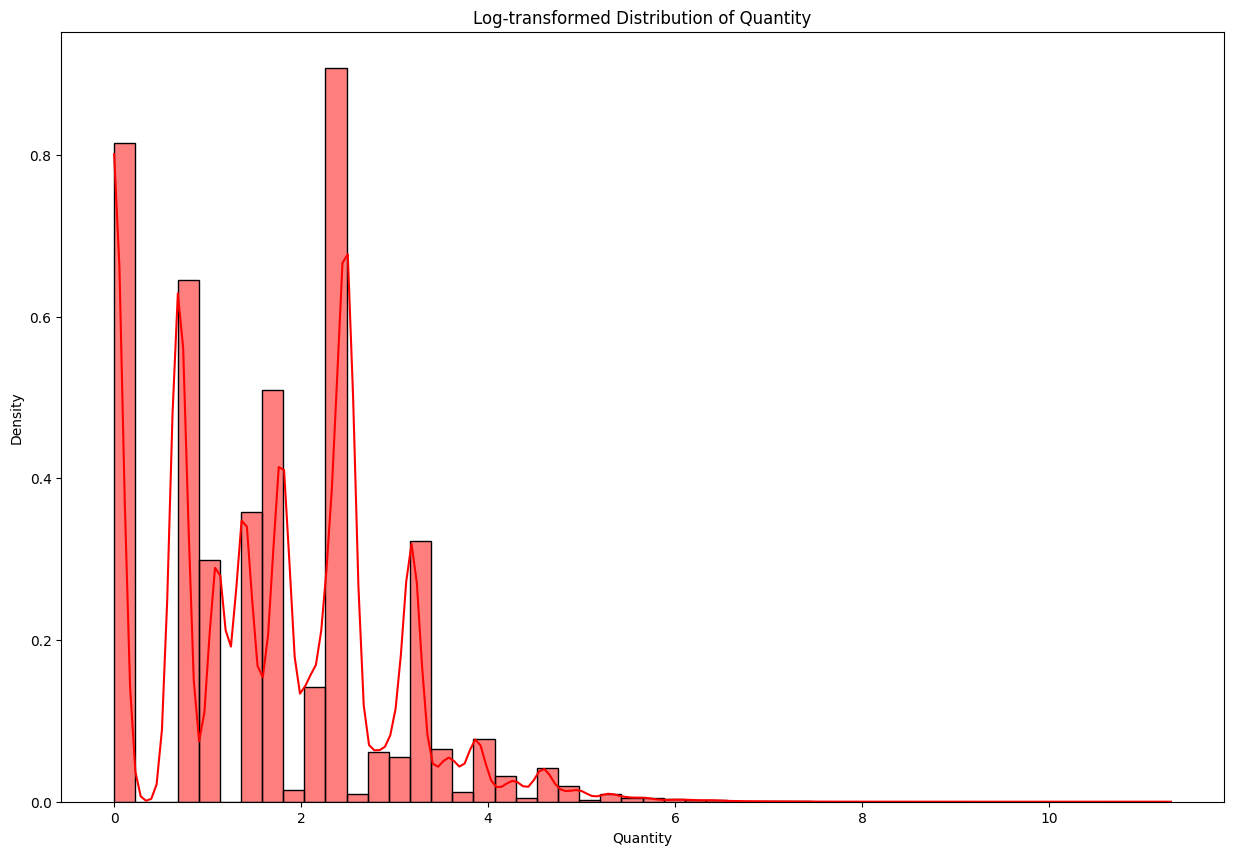

In [103]:
plt.figure(figsize=(15,10))
plt.title('Log-transformed Distribution of Quantity')
sns.histplot(np.log(customer_df['Quantity']), color="r",stat = 'density', kde=True, bins=50)
plt.show()

### **Distribution of Unit Price**

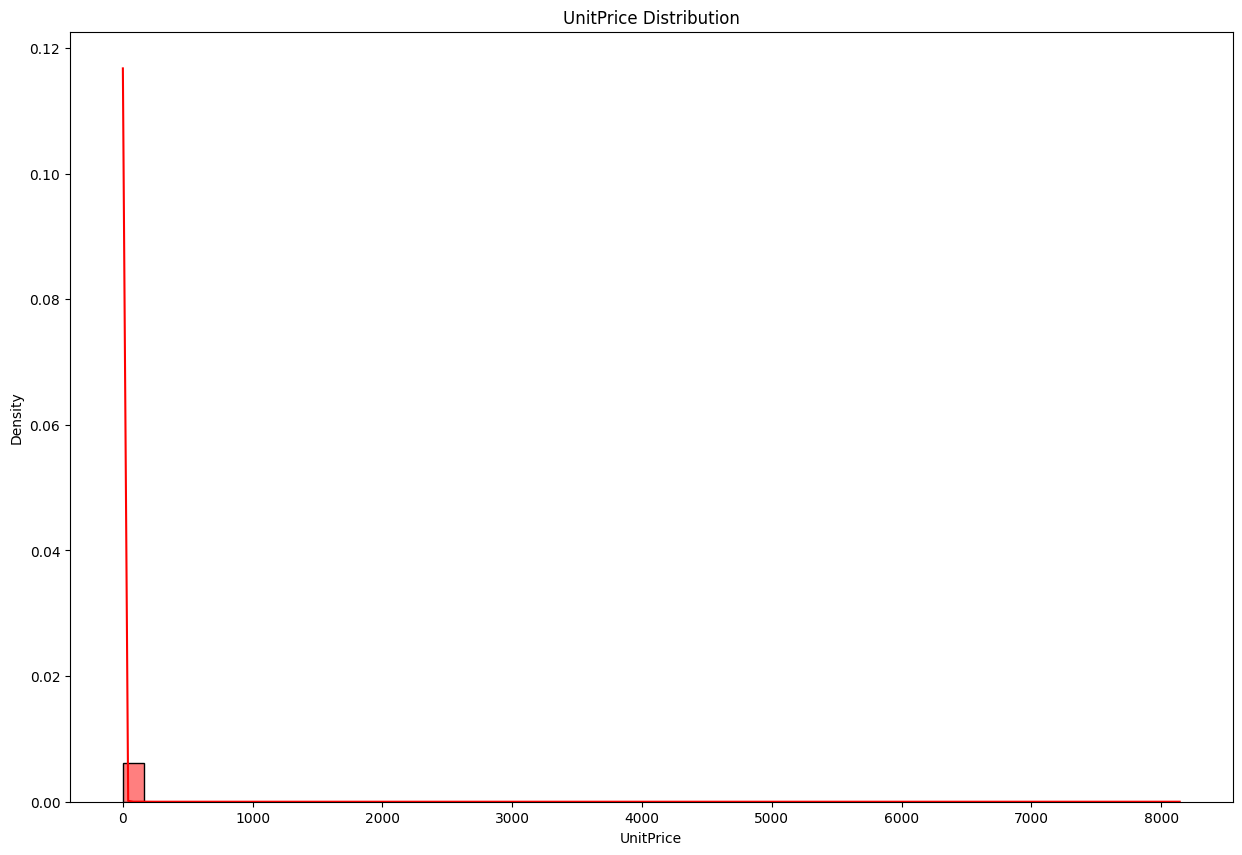

In [104]:
plt.figure(figsize=(15,10))
plt.title('UnitPrice Distribution')
sns.histplot(customer_df['UnitPrice'], color="r", bins=50, kde=True, stat='density');

**Observation:**
*From the distribution of unit price, we can say that most items have a lower price range.*



## **Feature Engineering**

In [105]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397924 non-null  object 
 1   StockCode    397924 non-null  object 
 2   Description  397924 non-null  object 
 3   Quantity     397924 non-null  int64  
 4   InvoiceDate  397924 non-null  object 
 5   UnitPrice    397924 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      397924 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


### **Creation of Month, Day and Hour from Invoice date**

In [106]:
customer_df['InvoiceDate']

0         12-01-2010 08:26
1         12-01-2010 08:26
2         12-01-2010 08:26
3         12-01-2010 08:26
4         12-01-2010 08:26
                ...       
541904    12-09-2011 12:50
541905    12-09-2011 12:50
541906    12-09-2011 12:50
541907    12-09-2011 12:50
541908    12-09-2011 12:50
Name: InvoiceDate, Length: 397924, dtype: object

In [107]:
from datetime import datetime

# List of formats you know
date_formats = [
    "%m-%d-%Y %H:%M",  # 12-01-2010 08:26
    "%m/%d/%y %H:%M",  # 1/18/11 10:01
]

default_date = datetime(2011, 12, 10)  # fallback if parsing fails

def parse_datetime(x):
    for fmt in date_formats:
        try:
            return datetime.strptime(x, fmt)
        except:
            continue
    # Try pandas automatic parsing as a last resort
    try:
        return pd.to_datetime(x)
    except:
        return default_date

# Apply to the column
customer_df["InvoiceDate"] = customer_df["InvoiceDate"].apply(parse_datetime)

# Verify
print(customer_df["InvoiceDate"].dtype)  # should be datetime64[ns]
print(customer_df["InvoiceDate"].head())


datetime64[ns]
0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
2   2010-12-01 08:26:00
3   2010-12-01 08:26:00
4   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]


In [108]:
#Converting InvoiceDate columns into date time format


customer_df["InvoiceDate"] = pd.to_datetime(customer_df["InvoiceDate"])

In [109]:
# Creating a new features from Invoicedate
customer_df['Month'] = customer_df['InvoiceDate'].dt.month_name()
customer_df['Day'] = customer_df['InvoiceDate'].dt.day_name()
customer_df['Hour'] = customer_df['InvoiceDate'].dt.hour

#### **Months**

In [110]:
customer_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Month', 'Day', 'Hour'],
      dtype='object')

In [111]:
#creating month dataframe
month_df = customer_df['Month'].value_counts().reset_index()
month_df.rename(columns={'Month': 'Month_Name'}, inplace=True)
month_df.rename(columns={'count': 'Count'}, inplace=True)
month_df

,Month_Name,Count
0,November,64545
1,October,49557
2,December,43464
3,September,40030
4,May,28322
5,June,27185
6,March,27177
7,August,27013
8,July,26827
9,April,22644


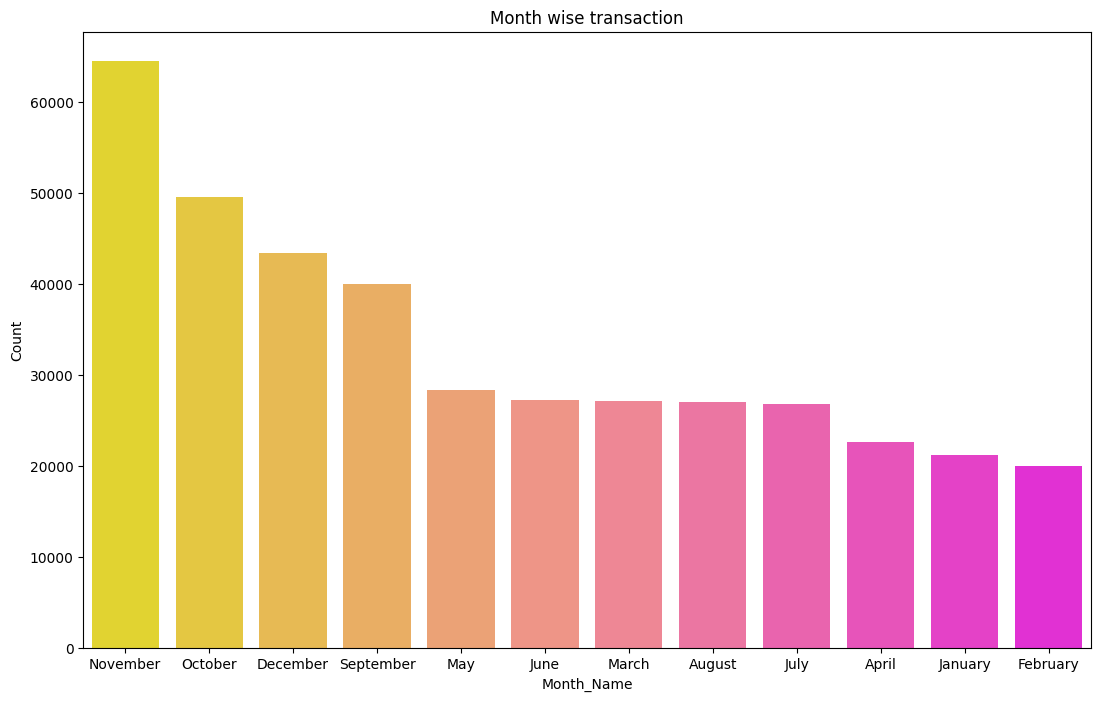

In [112]:
#plotting for month
plt.figure(figsize=(13,8))
plt.title('Month wise transaction')
sns.barplot(x='Month_Name',y='Count',data=month_df,palette='spring_r');

**Observation:** 
* Most numbers of customers have purchased the gifts in the month of November, October and December.As we all know they have festive season in end of the year as well new year to celebrate so we have highest numbers of transaction in november, october, december as company have most of the customer wholesales who are keeping stocks for festive season.

* Least numbers of purchasing are in the month of April and February.

#### **Days**

In [113]:
#creating day dataframe
day_df = customer_df['Day'].value_counts().reset_index()
day_df.rename(columns={'Day': 'Day_Name'}, inplace=True)
day_df.rename(columns={'count': 'Count'}, inplace=True)
day_df
     

,Day_Name,Count
0,Thursday,80052
1,Wednesday,68888
2,Tuesday,66476
3,Monday,64899
4,Sunday,62775
5,Friday,54834


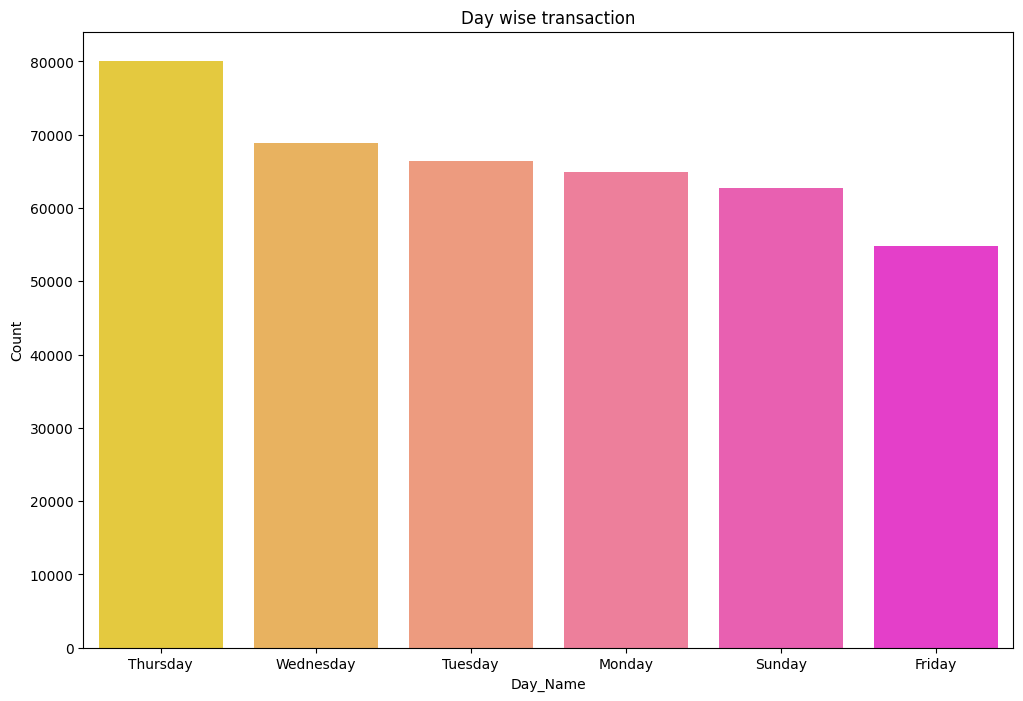

In [114]:
#plotting for days
plt.figure(figsize=(12,8))
plt.title('Day wise transaction')
sns.barplot(x='Day_Name',y='Count',data=day_df, palette='spring_r');

**Observation:**

We can see the maximum number of transactions are for Thursday but we can also see there are no transactions on Saturday at this point I have no idea why but there can be reasons probably data is not available for Saturdays or no transactions happened on Saturday.

Most of the customers purchased the items on Thursday, Wednesday and Tuesday.

#### **Hours**

In [115]:
#Creating hour dataframe
hour_df = customer_df['Hour'].value_counts().reset_index()
hour_df.rename(columns={'Hour': 'Hours'}, inplace=True)
hour_df.rename(columns={'count': 'Count'}, inplace=True)
hour_df

,Hours,Count
0,12,72069
1,13,64031
2,14,54127
3,11,49092
4,15,45372
5,10,37999
6,16,24093
7,9,21945
8,17,13072
9,8,8691


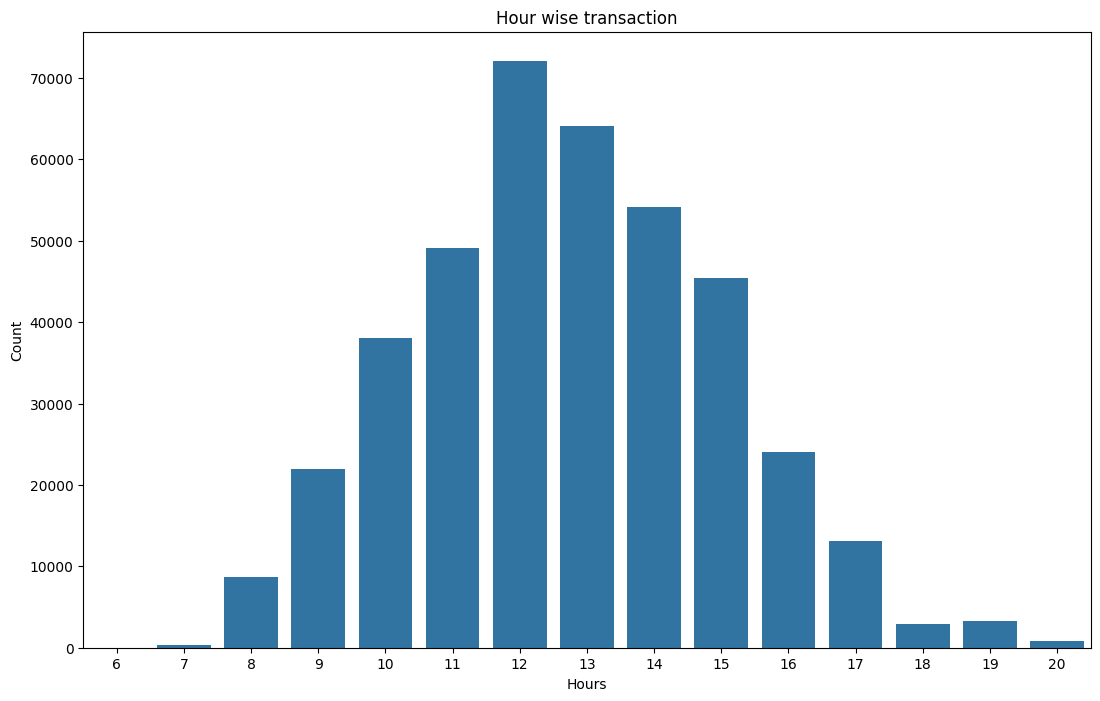

In [116]:
#plotting for hour
plt.figure(figsize=(13,8))
plt.title('Hour wise transaction')
sns.barplot(x='Hours',y='Count',data=hour_df);

**Observation:**

From the above graph we can say that most numbers of purchasing is done between 12pm clock to 3pm.

In [117]:
# dividing hours into morning, afternoon and evening
def time_type(time):
  if(time>=6 and time<=11):
    return "Morning"
  elif(time>=12 and time<=17):
    return 'Afternoon'
  else:
    return "Evening"

In [118]:
#applying function we created on hour column
customer_df['Time_type'] = customer_df['Hour'].apply(time_type)

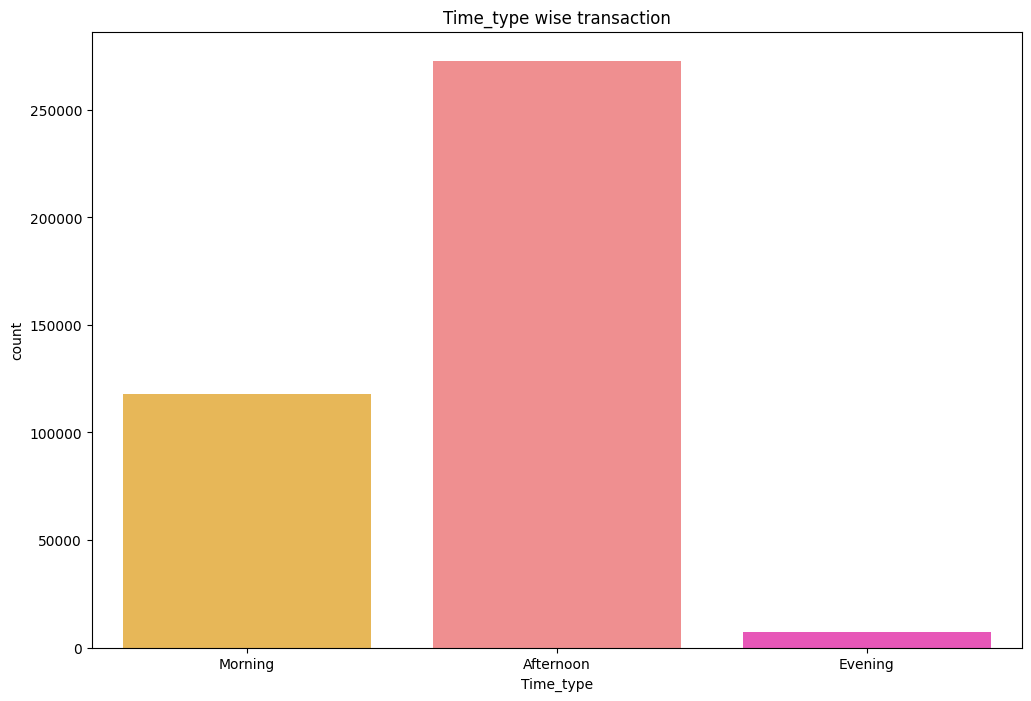

In [119]:
#plotting for time type
plt.figure(figsize=(12,8))
plt.title('Time_type wise transaction')
sns.countplot(x='Time_type',data=customer_df, palette='spring_r');

**Observation:**

Most of the customers have purchased the items in the Afternoon.

Moderate numbers of customers have purchased the items in Morning and least numbers of customers have purchased the items in the Evening.To increase transacction in the morning we can do one thing provide the offers/discounts at Evening.

### **Creation and distribution of total amount**

In [120]:
# Creating a new feature TotalAmount from product of Quantity and Unitprice
customer_df['TotalAmount'] = customer_df['Quantity']*customer_df['UnitPrice']

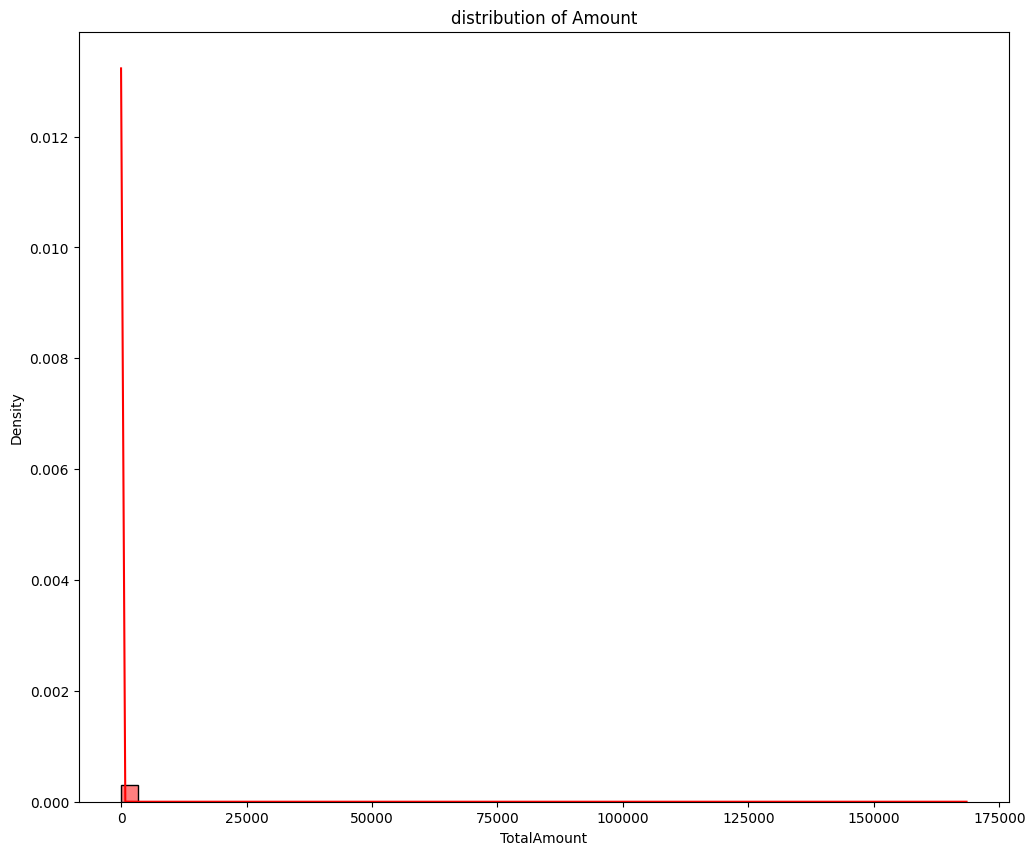

In [121]:
# checking distribution for Total amount
plt.figure(figsize = (12,10))
plt.title('distribution of Amount')
sns.histplot(customer_df['TotalAmount'],bins = 50 , kde= True ,color = 'r', stat = 'density');

## **Creating the RFM model**
**(Recency, Frequency and Monetary value)**

RFM is a method used for analyzing customer value. It is commonly used in database marketing and direct marketing and has received particular attention in retail and professional services industries.

RFM stands for the three dimensions.



**Recency** - In order to find the recency value of each customer, we need to determine the last invoice date as the current date and subtract the last purchasing date of each customer from this date.
say: How recently did the customer purchase?

**Frequency** - In order to find the frequency value of each customer, we need to determine how many times the customers make purchases.
say: How often do they purchase?

**Monetary** - In order to find the monetary value of each customer, we need to determine how much do the customers spend on purchases.
say How much do they spend?

In [122]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
 8   Month        397924 non-null  object        
 9   Day          397924 non-null  object        
 10  Hour         397924 non-null  int32         
 11  Time_type    397924 non-null  object        
 12  TotalAmount  397924 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int32(1), int64(1), object(7)
memory usage: 41.0+ MB


In [123]:
customer_df[customer_df['CustomerID'] == 12346]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,Hour,Time_type,TotalAmount
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,January,Tuesday,10,Morning,77183.6


In [124]:
#Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total
#Amount for each customer

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
rfm_df = customer_df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

#Convert Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].fillna(0).astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'TotalAmount': 'Monetary'}, inplace=True)

rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


In [125]:
rfm_df.describe()

,Recency,Frequency,Monetary
count,4339.000000,4339.000000,4339.000000
mean,92.041484,91.708689,2053.793018
std,100.007757,228.792852,8988.248381
min,0.000000,1.000000,0.000000
25%,17.000000,17.000000,307.245000
50%,50.000000,41.000000,674.450000
75%,141.500000,100.000000,1661.640000
max,373.000000,7847.000000,280206.020000


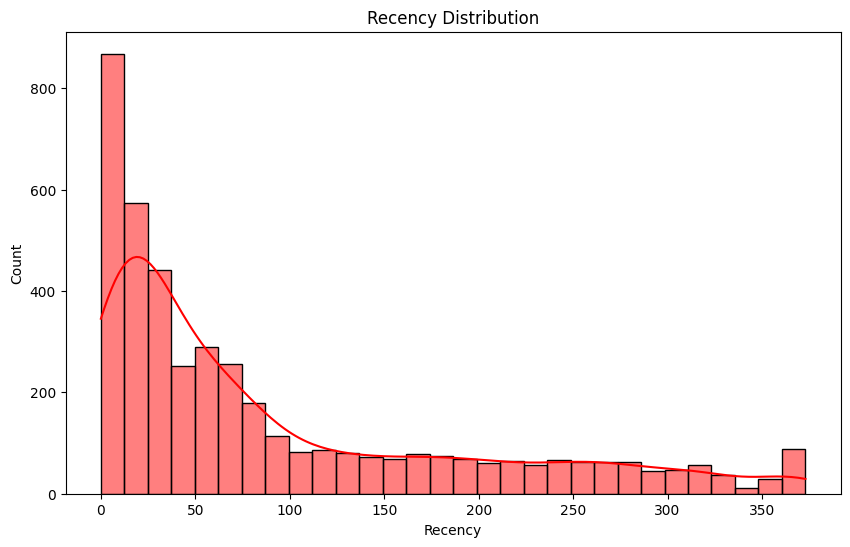

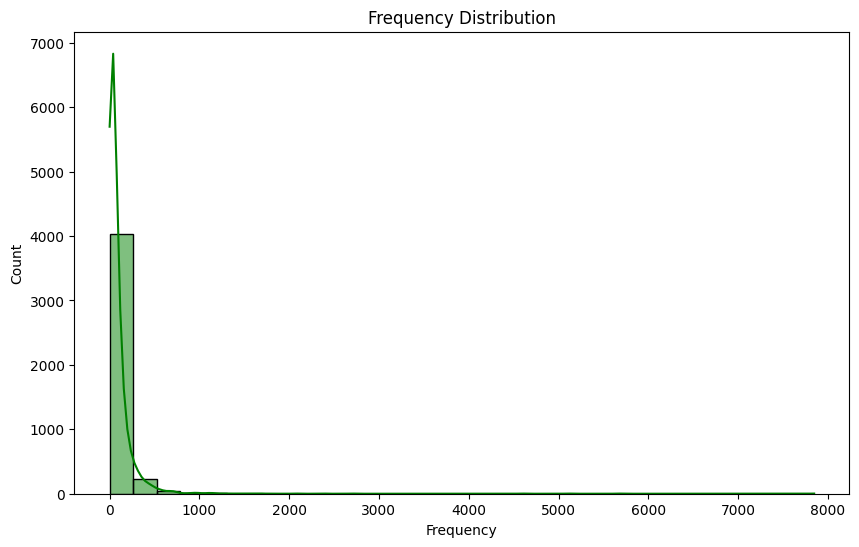

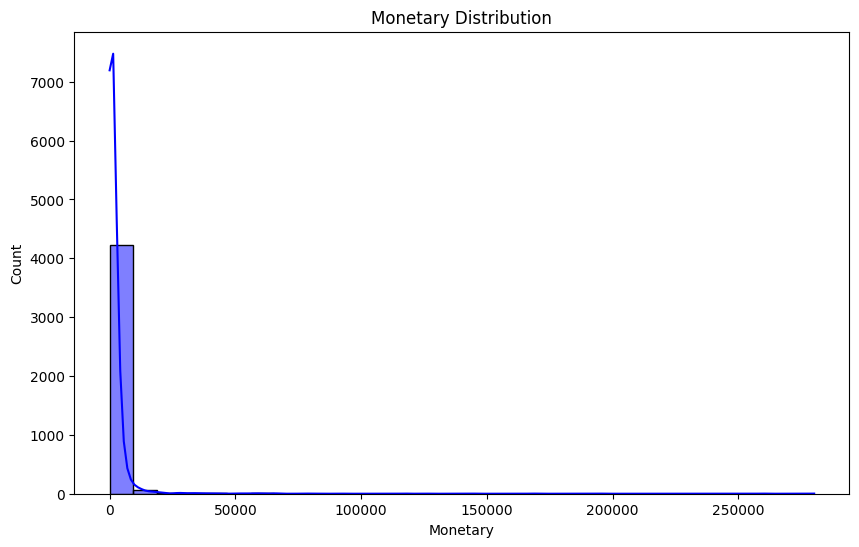

In [126]:
# distribution of RFM
# Columns to plot
columns = ['Recency', 'Frequency', 'Monetary']
colors = ['r', 'g', 'b']

for col, color in zip(columns, colors):
    plt.figure(figsize=(10,6))
    sns.histplot(rfm_df[col], kde=True, color=color, bins=30)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

**Observation:**
From all the above graphs of Recency,Frequency and Monetary we can say that all are positively skewed distribution.

### **Splitting RFM into quartile**

In [127]:
#Split into four segments using quantiles
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [128]:
quantiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.5},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0},
 'Monetary': {0.25: 307.24499999999995, 0.5: 674.4499999999998, 0.75: 1661.64}}

In [129]:
#Functions to create R, F and M segments according to quantiles for recency low score is important and for frequency and monetory maximum is important.

#so keeping this in mind we are creating two function to create scores

# Recency function
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1
# Frequency and Monetary function
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

In [130]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
rfm_df['R'] = rfm_df['Recency'].apply(RScoring, args=('Recency',quantiles,))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,1,1,4
12347.0,2,182,4310.00,4,4,4
12348.0,75,31,1797.24,2,2,4
12349.0,18,73,1757.55,3,3,4
12350.0,310,17,334.40,1,1,2


In [131]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm_df['RFMGroup'] = rfm_df.R.map(str) + rfm_df.F.map(str) + rfm_df.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis = 1)
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,1,1,4,114,6
12347.0,2,182,4310.00,4,4,4,444,12
12348.0,75,31,1797.24,2,2,4,224,8
12349.0,18,73,1757.55,3,3,4,334,10
12350.0,310,17,334.40,1,1,2,112,4


In [132]:
#Handling negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Applying handle_neg_n_zero function to Recency and Monetary columns
rfm_df['Recency'] = [handle_neg_n_zero(x) for x in rfm_df.Recency]
rfm_df['Monetary'] = [handle_neg_n_zero(x) for x in rfm_df.Monetary]

#Performing Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)


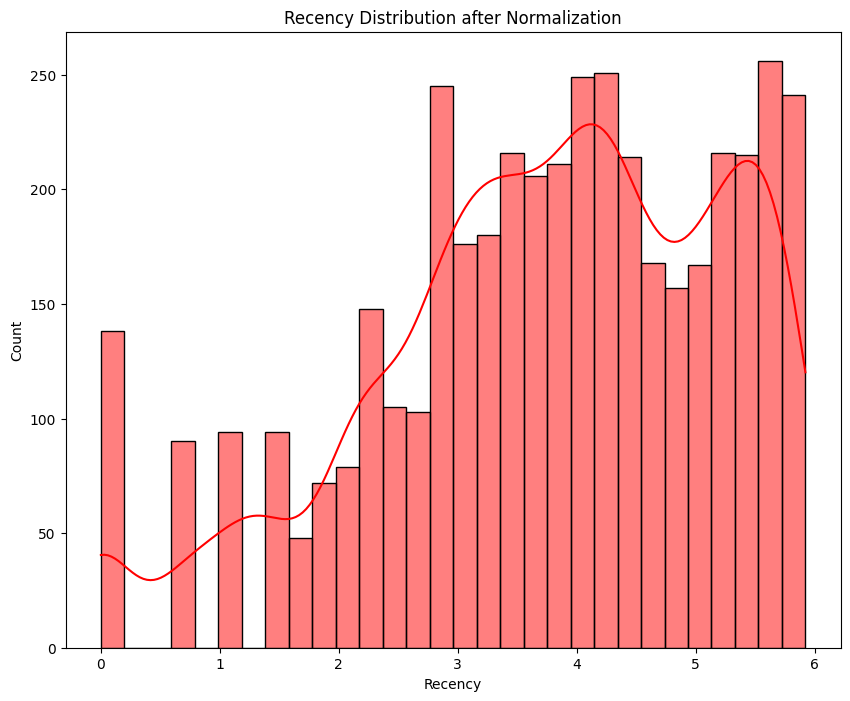

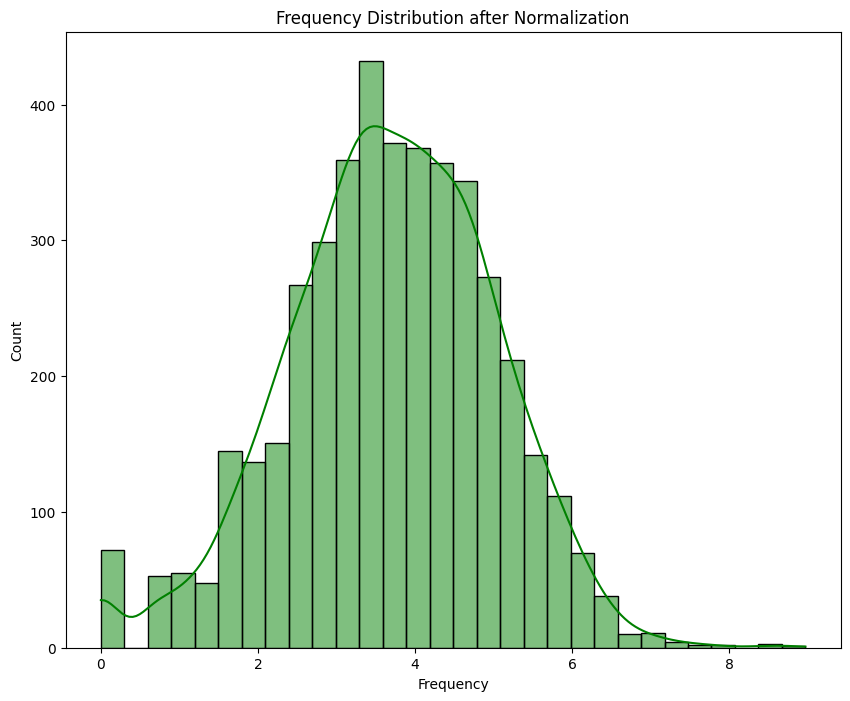

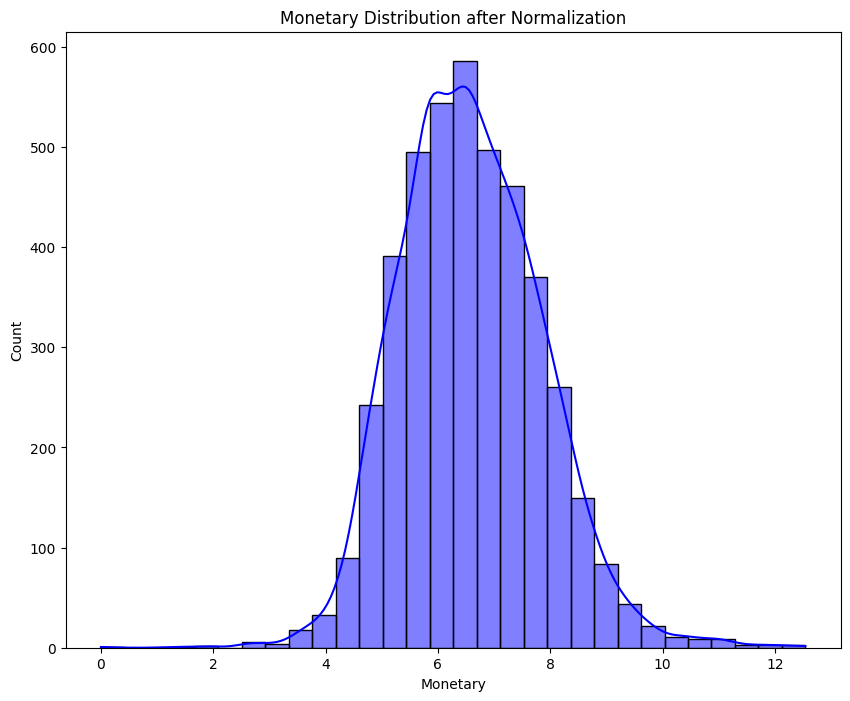

In [133]:
# Columns and optional filters
plots_info = {
    'Recency': {'data': Log_Tfd_Data['Recency'], 'color': 'r'},
    'Frequency': {'data': Log_Tfd_Data.query('Frequency < 1000')['Frequency'], 'color': 'g'},
    'Monetary': {'data': Log_Tfd_Data.query('Monetary < 10000')['Monetary'], 'color': 'b'}
}

# Plot all in one code
for col, info in plots_info.items():
    plt.figure(figsize=(10,8))
    sns.histplot(info['data'], kde=True, color=info['color'], bins=30)
    plt.title(f'{col} Distribution after Normalization')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

**Observation:**
As we can see from the above plots, skewness has been removed from the data.


In [134]:
rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(math.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log)

## **Clustering**

### **K - Means Clustering**

K-Means is an unsupervised machine learning algorithm used to group (cluster) data points into K distinct clusters based on their features. The main idea is to minimize the distance between points within the same cluster and maximize the distance between different clusters

#### **Applying Silhouette Score & Elbow Method on Recency_log , Frequency_log and Monetary_log**

In [135]:
# scaling features
from sklearn import preprocessing

feature_vector = ['Recency_log','Frequency_log','Monetary_log']
X_features = rfm_df[feature_vector].values
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X_features)

# applying silhouette method on RFM
range_n_clusters = [2,3,4,5,6,7,8,9,10]

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, n_init=10, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # per-sample silhouette scores
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    # per-cluster averages
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        cluster_score = np.mean(ith_cluster_silhouette_values)
        print(f"Number_of_clusters={n_clusters}, cluster={i}, silhouette_score={cluster_score:.4f}")

Number_of_clusters=2, cluster=0, silhouette_score=0.3626
Number_of_clusters=2, cluster=1, silhouette_score=0.4212
Number_of_clusters=3, cluster=0, silhouette_score=0.3031
Number_of_clusters=3, cluster=1, silhouette_score=0.2736
Number_of_clusters=3, cluster=2, silhouette_score=0.3214
Number_of_clusters=4, cluster=0, silhouette_score=0.2217
Number_of_clusters=4, cluster=1, silhouette_score=0.3360
Number_of_clusters=4, cluster=2, silhouette_score=0.2958
Number_of_clusters=4, cluster=3, silhouette_score=0.3149
Number_of_clusters=5, cluster=0, silhouette_score=0.3161
Number_of_clusters=5, cluster=1, silhouette_score=0.2305
Number_of_clusters=5, cluster=2, silhouette_score=0.3284
Number_of_clusters=5, cluster=3, silhouette_score=0.2121
Number_of_clusters=5, cluster=4, silhouette_score=0.2544
Number_of_clusters=6, cluster=0, silhouette_score=0.2538
Number_of_clusters=6, cluster=1, silhouette_score=0.2559
Number_of_clusters=6, cluster=2, silhouette_score=0.3268
Number_of_clusters=6, cluster=3

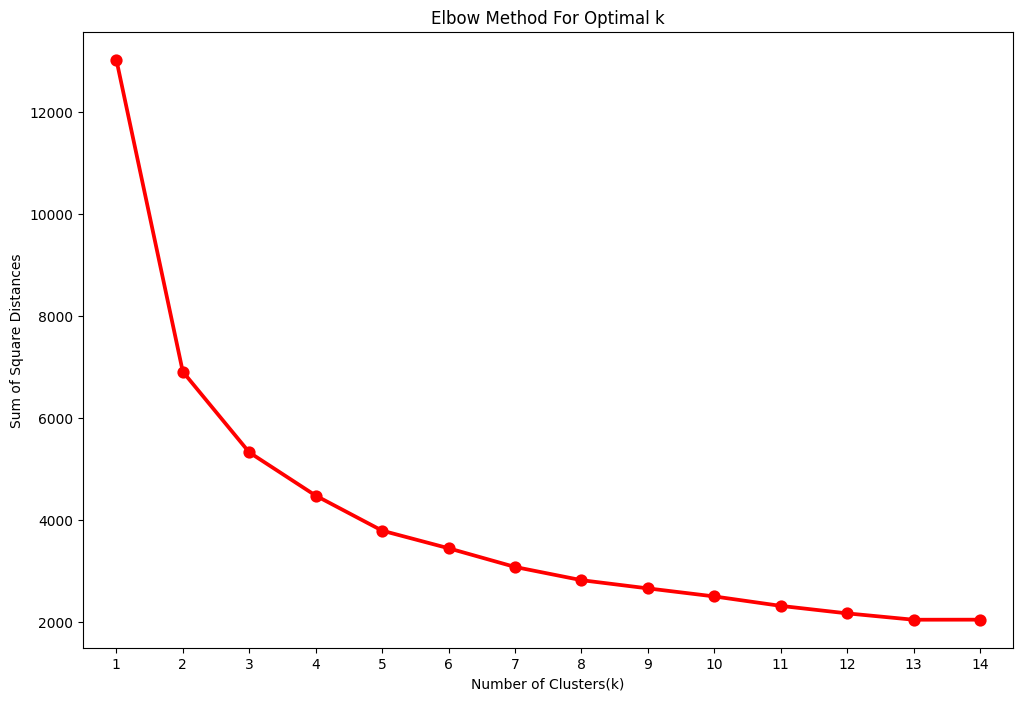

In [136]:
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_

#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(12,8))
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()),color='r')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

**Observation :**
From the Silhouette analysis &elbow method, it is clearly understood that, 2 clusters are performing best. Hence, 2 clusters will be selected to build the KMeans model and classify the customers.

### **Fitting K mean model**

In [145]:
print(X) ## standardized value of  Recency_log , Frequency_log and Monetary_log

[[ 1.38836443e+00 -2.77292853e+00  3.68875227e+00]
 [-2.06444705e+00  1.14932524e+00  1.40714410e+00]
 [ 3.93804279e-01 -1.84736382e-01  7.15456799e-01]
 ...
 [-1.21474602e+00 -9.00057288e-01 -1.11279023e+00]
 [-1.78943563e+00  2.22261852e+00  8.36639760e-01]
 [ 5.35650412e-04  4.29157375e-01  7.32880978e-01]]


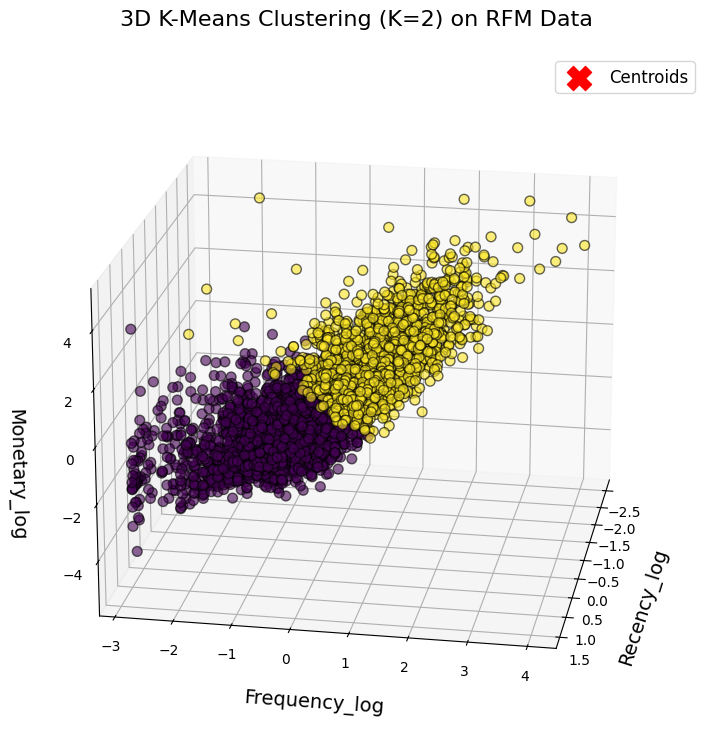

In [154]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Train KMeans
KMean_clust = KMeans(n_clusters=2, init='k-means++', max_iter=1000, random_state=42)
KMean_clust.fit(X)
cluster_labels = KMean_clust.labels_
centers = KMean_clust.cluster_centers_

# 3D plot
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111, projection='3d')

# Scatter points colored by cluster
scatter = ax.scatter(
    X[:,0], X[:,1], X[:,2],
    c=cluster_labels, cmap='viridis',
    s=50, alpha=0.6, edgecolor='k'
)

# Plot centroids
ax.scatter(
    centers[:,0], centers[:,1], centers[:,2],
    c='red', s=300, marker='X', label='Centroids'
)

# Set axis labels with larger font size
ax.set_xlabel("Recency_log", fontsize=14, labelpad=15)
ax.set_ylabel("Frequency_log", fontsize=14, labelpad=15)
ax.set_zlabel("Monetary_log", fontsize=14, labelpad=15)

ax.view_init(elev=20, azim=10) 

# Title and legend
ax.set_title("3D K-Means Clustering (K=2) on RFM Data", fontsize=16, pad=20)
ax.legend(fontsize=12)

plt.show()

